In [2]:
''' import ''' 
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [3]:
''' load data '''
data = io.loadmat('./data/hw2_prob2.mat')

A = data['A']
M, N = A.shape

In [4]:
''' hyper param '''
ALPHA = 0.01
BETA = 0.8
EPS = 1e-10
MAXITERS = 10000

''' constraint '''
D_max = 63
D_min = 59
D_95 = 60

In [5]:
d = A@x
v_95 = np.sum(d > 95)
v_c = (v_95 > len(d)*0.95)



NameError: name 'x' is not defined

In [ ]:
''' with constraints (D_min, D_max, DVH) '''

# gradient desent method
f_hist = []

x = np.zeros((N, 1))

for i in range(MAXITERS):

    # f, grad
    d = A@x
    c_max = (d - D_max)
    c_min = (D_min - d)

    dvh_frac = np.sum(d)
    c_v = (dvh_frac < 0.95)
    c_d = (d > 95)

    f = (c_max > 0)*c_max**2 + (c_dvh > 0)*c_dvh**2 + (c_min > 0)*c_min**2
    grad = 2*A.T@(c_max - c_min - c_dvh)

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    # line search
    while True:
        dp = A@(x + t*delta_x)
        c_max_p = (dp - D_max)
        c_min_p = (D_min - dp)
        c_dvh_p = (D_95 - dp)
        
        fp = sum((c_max_p > 0)*c_max_p**2 + (c_min_p > 0)*c_min_p**2 + (c_dvh_p > 0)*c_dvh_p**2)
        
        if (fp <= f + ALPHA*t*grad.T@delta_x):
            break
        
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist.append(f)

    print(f'i = {i}, f = {f}')

# optimal
x = x

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

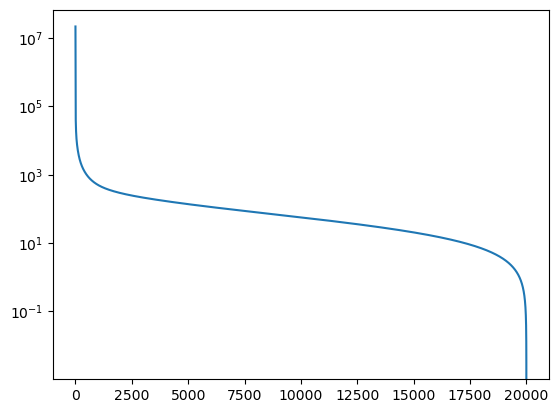

In [70]:
# plot
plt.semilogy(f_hist - f_hist[-1])
plt.show()

In [16]:
''' save '''
# np.savez('./opt/hw2_3.npz', A=A, x=x, f_hist=f_hist)

''' load '''
data = np.load('./opt/hw2_3.npz')

A = data['A']
x = data['x']
f_hist = data['f_hist']

In [77]:
''' DVH '''
def get_DVH_PTV(beam_kernel, beam_intensity):

    dose = beam_kernel@beam_intensity

    # differential DVH
    bins = np.linspace(0, 100, 1000)
    diff_DVH, _ = np.histogram(dose, bins=bins)

    # cumulative DVH
    cum_DVH = np.flip(np.cumsum(np.flip(diff_DVH)))
    cum_DVH = cum_DVH / np.max(cum_DVH) # normalize

    return cum_DVH

In [78]:
# calc
dvh = get_DVH_PTV(A, x)

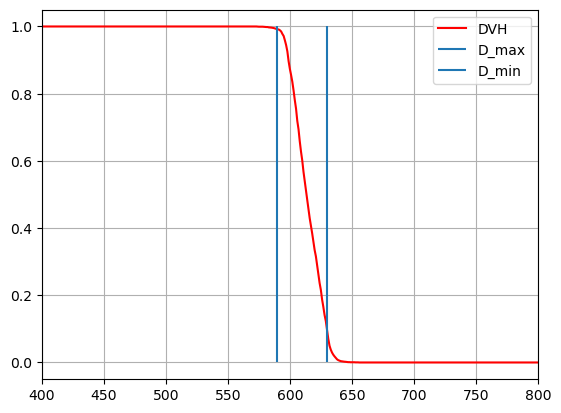

In [79]:
# plot
plt.plot(dvh, label='DVH', c='red')
plt.vlines(D_max*10, 0, 1, label='D_max')
plt.vlines(D_min*10, 0, 1, label='D_min')

plt.xlim([400, 800])
plt.legend()
plt.grid()
plt.show()